In [1]:
%cd ..

/home/lab-admin/Code/vr-exoskeleton


/home/lab-admin/Code/vr-exoskeleton/venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# evaluate

In [2]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from vr_exoskeleton import data_utils

## Load predictions

In [3]:
window_size = 3
stamp = 1718828670

In [4]:
users, X, Y, Y_hat = (np.load(os.path.join('output', str(stamp), f'test_{suffix}.npy'))
                      for suffix in ['users', 'input', 'head_actual', 'head_predicted'])
print(users)
X.shape, Y.shape, Y_hat.shape

['User5' 'User19' 'User6' 'User20' 'User18' 'User3' 'User10' 'User12']


((1036605, 27), (1036605, 3), (1036605, 3))

In [5]:
# 'User19' and 'User20' happen to have 1 and 2 fewer total frames, respectively, than everyone else...
abs(len(users) * 4 * data_utils.N_TRIALS * (10801 - window_size) - X.shape[0]) <= 3

True

In [6]:
for i in range(3):
    print(f'context window index: {i:>3d}')
    for w in range(window_size):
        print(X[i, 9 * w:9 * w + 6], end=' ')
        print(X[i, 9 * w + 6:9 * w + 9])
    print()

context window index:   0
[-0.04296875 -0.1099243   0.9929962  -0.03353882 -0.09346008  0.9950562 ] [0.05224432 0.378807   0.9239999 ]
[-0.04367065 -0.1075897   0.9932251  -0.03700256 -0.08998108  0.9952545 ] [0.05120723 0.3783544  0.9242433 ]
[-0.04441833 -0.1070099   0.9932556  -0.03712463 -0.09559631  0.9947205 ] [0.05061905 0.3780724  0.9243912 ]

context window index:   1
[-0.04367065 -0.1075897   0.9932251  -0.03700256 -0.08998108  0.9952545 ] [0.05120723 0.3783544  0.9242433 ]
[-0.04441833 -0.1070099   0.9932556  -0.03712463 -0.09559631  0.9947205 ] [0.05061905 0.3780724  0.9243912 ]
[-0.04592896 -0.1064148   0.9932556  -0.03398132 -0.09507751  0.9948883 ] [0.05061905 0.3780724  0.9243912 ]

context window index:   2
[-0.04441833 -0.1070099   0.9932556  -0.03712463 -0.09559631  0.9947205 ] [0.05061905 0.3780724  0.9243912 ]
[-0.04592896 -0.1064148   0.9932556  -0.03398132 -0.09507751  0.9948883 ] [0.05061905 0.3780724  0.9243912 ]
[-0.04612732 -0.106308    0.9932556  -0.04148865

In [7]:
Y[:10]

array([[0.05061905, 0.3780724 , 0.9243912 ],
       [0.04998963, 0.3779454 , 0.9244773 ],
       [0.04926498, 0.3776433 , 0.9246396 ],
       [0.04880094, 0.3776798 , 0.9246494 ],
       [0.04880094, 0.3776798 , 0.9246494 ],
       [0.04833749, 0.377965  , 0.9245571 ],
       [0.04790765, 0.3784871 , 0.9243659 ],
       [0.04763045, 0.3788521 , 0.9242307 ],
       [0.04763045, 0.3788521 , 0.9242307 ],
       [0.04705402, 0.3796342 , 0.9239393 ]], dtype=float32)

In [8]:
Y_hat[:10]

array([[0.05250901, 0.37671265, 0.9257214 ],
       [0.05295809, 0.37683138, 0.9256046 ],
       [0.05229818, 0.37691647, 0.9256523 ],
       [0.05128909, 0.37635216, 0.9258907 ],
       [0.05084161, 0.3764123 , 0.9258604 ],
       [0.05123104, 0.3766145 , 0.9257998 ],
       [0.05078196, 0.37695855, 0.9256667 ],
       [0.05015686, 0.37767503, 0.9254179 ],
       [0.04998744, 0.37808952, 0.925261  ],
       [0.05020856, 0.37788734, 0.9253177 ]], dtype=float32)

## Plot trajectories

In [9]:
# steps = Y.shape[0]
steps = 2 ** 12
offset = 10801 * 41

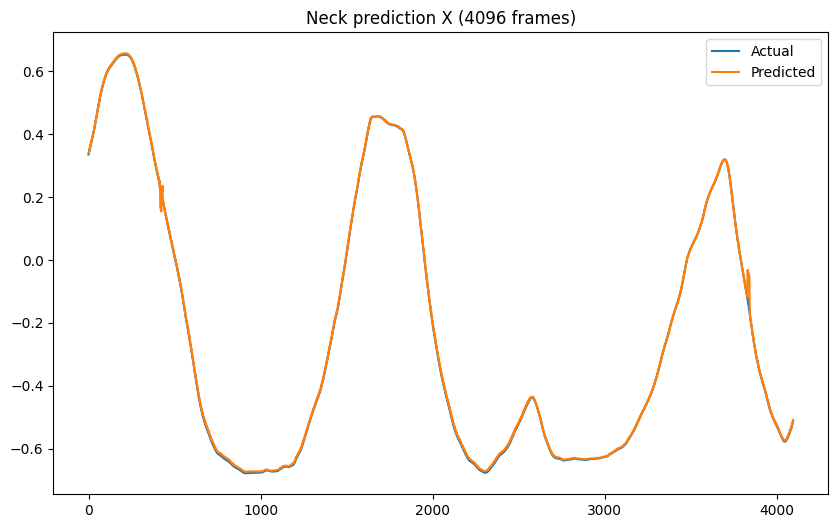

In [10]:
def plot_actual_predicted(y, y_hat, title=None):
    fig = plt.figure(figsize=(10, 6))
    plt.plot(y, label='Actual')
    plt.plot(y_hat, label='Predicted')
    if title is not None:
        plt.title(title)
    plt.legend()
    plt.show()


plot_actual_predicted(Y[offset:offset + steps, 0], Y_hat[offset:offset + steps, 0], title=f'Neck prediction X ({steps:d} frames)')

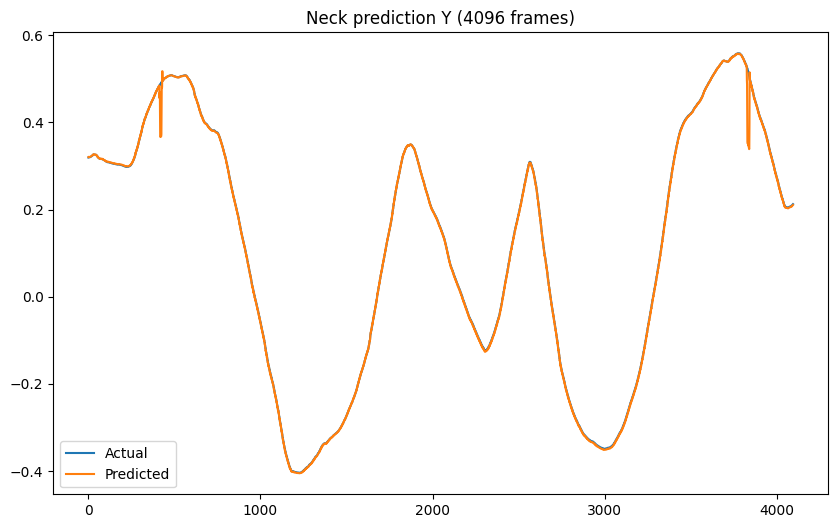

In [11]:
plot_actual_predicted(Y[offset:offset + steps, 1], Y_hat[offset:offset + steps, 1], title=f'Neck prediction Y ({steps:d} frames)')

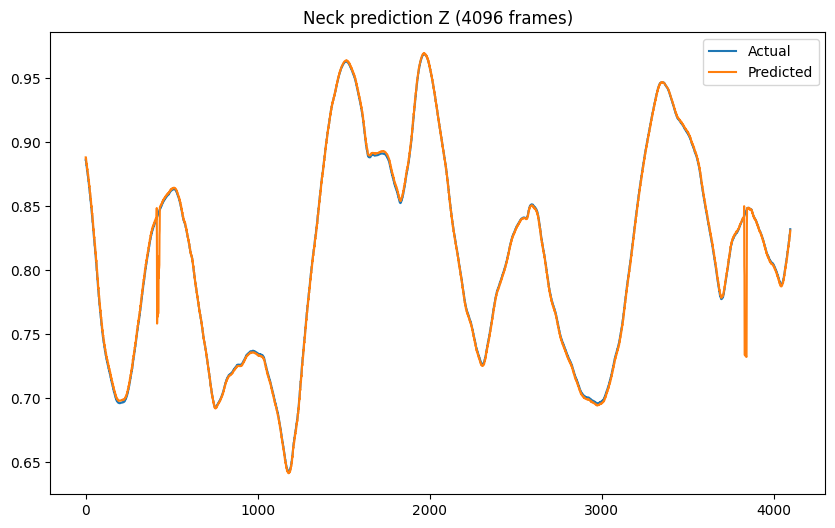

In [12]:
plot_actual_predicted(Y[offset:offset + steps, 2], Y_hat[offset:offset + steps, 2], title=f'Neck prediction Z ({steps:d} frames)')